#  **Data Visualization**

## **Jenis-Jenis Visualisasi Data dan Tujuannya**

Ada banyak sekali jenis visualisasi data, dari yang sederhana hingga yang kompleks. Setiap jenis visualisasi biasanya lebih tepat digunakan untuk suatu tujuan tertentu. Secara garis besar, ada empat tujuan visualisasi yang disampaikan oleh Andrew Abela sesuai gambar berikut.

<img src=".\images\kind of data visualizations.png">

Berikut penjelasannya:

**1. Perbandingan/Komparasi**

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.

**2. Distribusi**

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.

**3. Komposisi**

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

**4. Keterhubungan/Relasi**

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.

## **Membuat Multi-Line Chart**

Pada bagian ini, kita akan coba menggali lebih dalam tentang apa faktor yang
paling berpengaruh pada kenaikan GMV. Kita akan coba untuk menspesifikkan data
berdasarkan profinsi atau brand.

In [1]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt

Download file dengan `!wget`.




In [2]:
cd /content/drive/MyDrive/DQLAB/Data Visualization Part 2

/content/drive/MyDrive/DQLAB/Data Visualization Part 2


In [3]:
# !wget -O retail_row_reduced.csv 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv'

In [4]:
# Baca dataset
dataset = pd.read_csv('retail_row_reduced.csv')
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [5]:
# Cek type tiap kolom dalam dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [6]:
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

In [7]:
# Group gmv berdasarkan order_month dan brand
brands = dataset.groupby(['order_month','brand'])['gmv'].sum().unstack()
brands

brand,BRAND_A,BRAND_B,BRAND_C,BRAND_H,BRAND_J,BRAND_L,BRAND_P,BRAND_R,BRAND_S,BRAND_W
order_month,,,,,,,,,,
2019-07,326713000,260605000,272511000,89936000,348151000,244413000,394808000,473672000,816882000,296350000
2019-08,357401000,293799000,380110000,160446000,645394000,402161000,618439000,427185000,744362000,423626000
2019-09,258873000,217258000,288637000,168769000,430580000,237654000,530957000,451353000,943807000,419114000
2019-10,548614000,350125000,651095000,396724000,709920000,332522000,740415000,1207866000,1102456000,680200000
2019-11,527527000,571389000,522863000,428063000,307951000,468261000,837394000,748512000,802054000,968215000
2019-12,669029000,401298000,756636000,664723000,798862000,556561000,1008256000,1358124000,1289261000,645485000


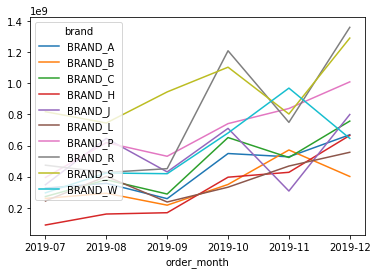

In [46]:
# Menampilkan plot
brands.plot()

Berhubung brand-nya ada banyak, dan defaultnya di tengah makanya jadi menutupi grafiknya. Solusinya adalah menggunakan method `plt.legend()` seperti yang ditunjukkan oleh potongan kode berikut ini:

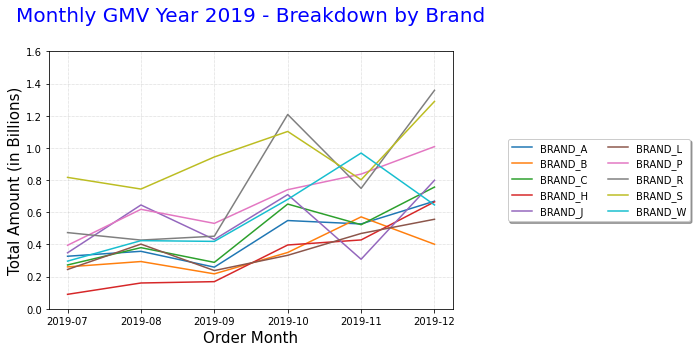

In [9]:
# Buat Multi-Line Chart dan edit legend
brands.plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(float))
plt.legend(loc='right', bbox_to_anchor=(1.6, 0.5), shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

Jika dilihat dari grafik GMV sepanjang Oktober-Desember 2019 yang dikelompokkan berdasarkan **Brand**, semuanya terlihat mirip dan tidak ada perubahan yang signifikan. Untuk itu, kita selanjutnya akan mencoba mengelompokkan GMV berdasarkan **Provinsi**.

Tapi sebelum itu, mari lihat beberapa parameter yang bisa ditambahkan untuk legend:

- **loc**: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
  * 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
  * 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
  * 'center': legend diletakkan di tengah-tengah axes
  * 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
- **bbox_to_anchor**: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
- **shadow**: jika diisi True, maka kotak legend akan memiliki bayangan.
- **ncol**: jumlah kolom dari isi legend, defaultnya adalah 1
- **fontsize**: ukuran huruf pada legend
- **title**: memberikan judul pada legend
- **title_fontsize**: ukuran huruf pada judul legend

## **Kustomisasi Colormap**

In [10]:
group_p = dataset.groupby(['order_month','province'])['gmv'].sum().unstack()
group_p

province,Bali,Banten,DKI Jakarta,Jawa Barat,Jawa Tengah,Jawa Timur,Yogyakarta
order_month,,,,,,,
2019-07,79480000,191513000,1951871000,476533000,252429000,282076000,290139000
2019-08,125025000,254130000,2014393000,735536000,507441000,324629000,491769000
2019-09,214442000,89088000,1469887000,886835000,607802000,268764000,410184000
2019-10,166994000,338610000,3272151000,1225234000,657536000,501911000,557501000
2019-11,170644000,153618000,2734964000,1247305000,429731000,646017000,799950000
2019-12,444627000,468673000,3459497000,1556706000,1030945000,626089000,561698000


<Figure size 432x288 with 0 Axes>

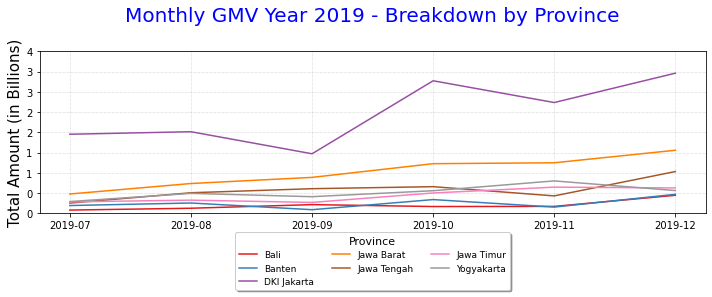

In [11]:
plt.clf()
group_p.plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), shadow=True, ncol=3,title='Province',fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Dari grafik diatas, terlihat ada beberapa provinsi yang mendominasi kenaikan GMV, seperti DKI Jakarta dan Jawa Barat. Sedangkan untuk provinsi sisanya, garisnya saling tumpang tindih yang artinya kenaikan GMV dimiliki tidak terlalu jauh berbeda satu dengan yang lainnya.

Selain itu, perhatikan juga bahwa pada grafik tersebut, list warnanya berbeda, tidak default seperti pada brand. Itu pada method `plot()` ditambahkan parameter `cmap` (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah *‘Set1’*, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

## **Membuat Line Chart GMV Breakdown by Top Provinces**

Terlihat cukup jelas jika kenaikan GMV disebabkan oleh provinsi. Untuk itu, kita akan fokus pada provinsi-provinsi yang GMV-nya besar saja, dan highlight untuk top 5 provinsi saja, yang lainnya kita gabungkan menjadi ‘other’.

In [12]:
# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


Setelah itu, membuat kolom baru dengan nama ‘province_top’. Seperti sebelumnya, manfaatkan function apply & lambda.

In [13]:
# Buat satu kolom lagi di dataset dengan nama province_top
# dan tampilkan jumlah data point untuk masing-masing provinsi
dataset['province_top'] = dataset['province']\
                          .apply(lambda x: x if (x in top_provinces['province']\
                                                  .to_list()) else 'other')
dataset['province_top'].value_counts()

DKI Jakarta    2552
Jawa Barat      824
Jawa Tengah     457
Jawa Timur      398
Yogyakarta      393
other           376
Name: province_top, dtype: int64

Kemudian, setelah memiliki kolom baru, grafiknya bisa di update. Sebagai catatan, untuk mengubah ukuran figure, juga bisa menggunakan function `plt.gcf().set_size_inches` yang diletakkan di akhir code, sebelum `plt.show()`. 

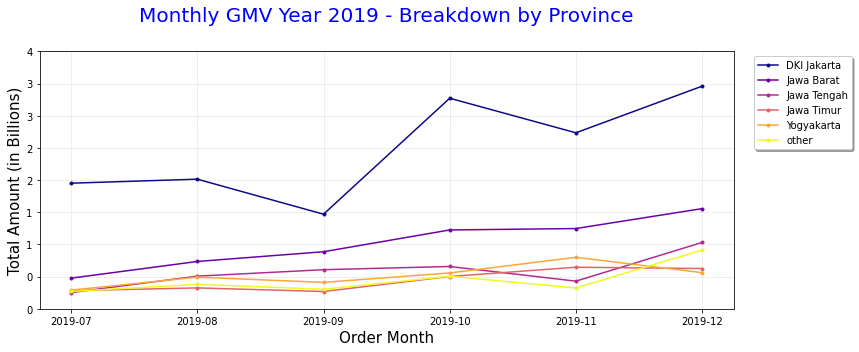

In [14]:
# Plot multi-line chartnya
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.',cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()



## **Membuat Anotasi**

Selanjutnya kita akan membuat anotasi. Anotasi mirip seperti teks, hanya saja ada suatu titik tertentu yang akan ditunjuk untuk diberikan informasi tambahan. Selain itu, kita juga bisa menambahkan panah melalui anotasi.

Untuk membuat annotate, gunakan function  plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:
- **xytext**: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
- **arrowprops**: Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
  * **arrowstyle**: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
  * **connectionstyle**: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
  * **color**: menentukan warna dari panah
 

Berikut adalah kode yang digunakan untuk menganotasi multi-line chart dari 5 propinsi dengan GMV tertinggi

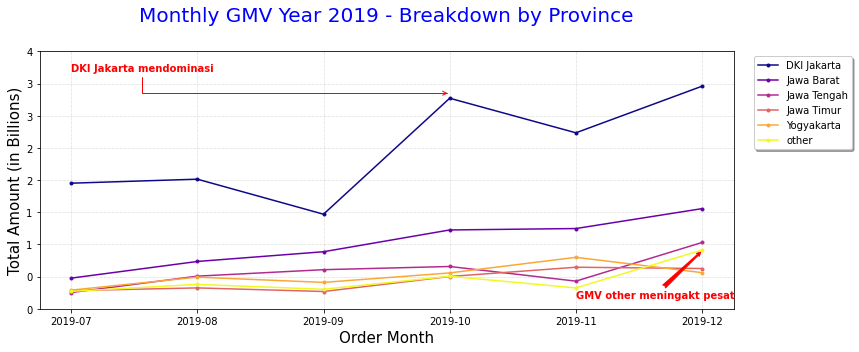

In [27]:
# Plot multi-line chartnya
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.',cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20,color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate('GMV other meningakt pesat', xy=(5, 900000000),
             xytext=(4, 170000000), weight='bold', color='red',
             arrowprops=dict(arrowstyle='fancy',
                             connectionstyle='arc3',
                             color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3, 3350000000),
             xytext=(0, 3700000000), weight='bold', color='red', 
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="angle",
                             color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()



Berikutnya, kita akan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019, hal ini dilakukan karena trend dari provinsi tersebut mirip dengan overall GMV. Untuk itu, kita akan filter datanya untuk kota-kota di DKI Jakarta pada range waktu bulan Oktober-Desember 2019 saja dan menyimpannya pada sebuah data frame baru.

In [29]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id  ... order_month      gmv province_top
0   1703458  2019-10-17        14004  ...     2019-10  7400000  DKI Jakarta
1   1706815  2019-10-24        17220  ...     2019-10  1208000  DKI Jakarta
2   1710718  2019-11-03        16518  ...     2019-11  8360000  DKI Jakarta
4   1702573  2019-10-16        15696  ...     2019-10  8950000  DKI Jakarta
6   1711399  2019-11-04        16791  ...     2019-11  1465000  DKI Jakarta

[5 rows x 12 columns]


## **Membuat Pie Chart**

Kita akan menampilkan persentase dari tiap kota di DKI Jakarta dalam sebuah **pie chart**. Untuk itu, sebelumnya kita perlu membuat data agregat masing-masing kota tersebut dan menyimpannya dalam sebuah variable yang kita namakan **gmv_per_city_dki_q4** yang selanjutnya datanya akan dimasukkan ke function `plt.pie()`.

Beberapa parameter yang bisa dimodifikasi:

* **labels**: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
* **colors**: array yang berisikan warna untuk masing-masing bagian pie.
* **autopct**: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
* **shadow**: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
* **radius**: jari-jari dari pie-chart

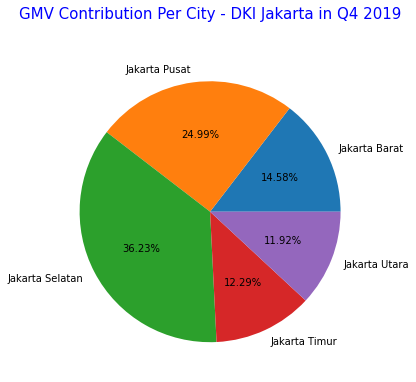

In [45]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%' )
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center',pad=30,fontsize=15, color='blue')
plt.show()

## **Membuat Bar Chart**